[*********************100%%**********************]  1 of 1 completed
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmode

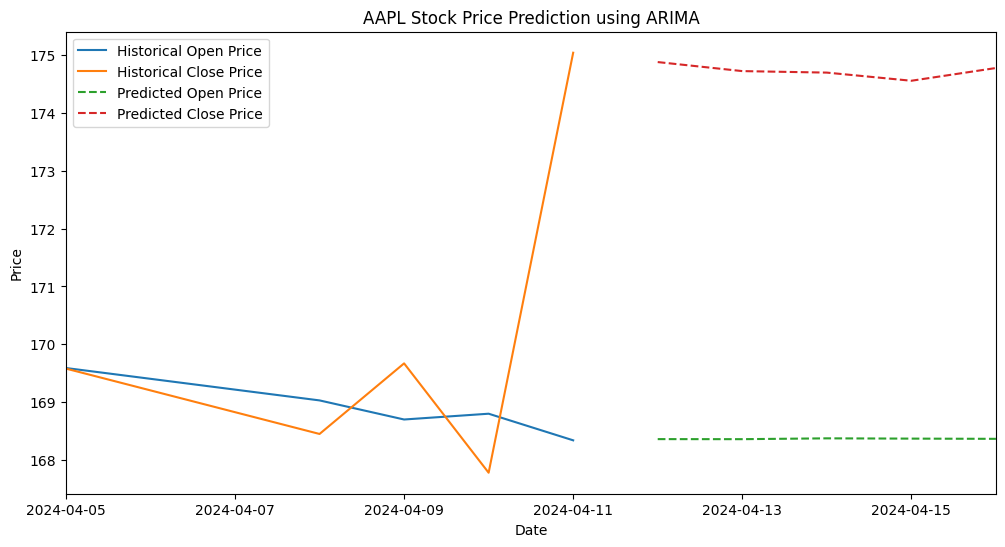

ARIMA - Training Time: 1.2892861366271973 seconds
ARIMA - RMSE Open: 0.6710837009752817
ARIMA - RMSE Close: 5.266053454825627



In [11]:
import time
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data[['Open', 'Close']]

def fit_arima_model(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

def predict_next_days(model_fit, days_to_predict):
    forecast = model_fit.forecast(steps=days_to_predict)
    return forecast

def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.
    
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

# User input
ticker = input("Enter ticker symbol: ")

# Parameters
start_date = '2012-01-01'
end_date = '2024-04-12'
days_to_predict = 5
arima_order = (5, 1, 0)  # Adjust based on your data and experimentation
results = {   
    'ARIMA': {'RMSE Open': None, 'RMSE Close': None, 'Training Time': None},
    }
# Fetch data
data = fetch_data(ticker, start_date, end_date)
start_time = time.time()

# Fit ARIMA models for Open and Close prices
model_fit_open = fit_arima_model(data['Open'], arima_order)
model_fit_close = fit_arima_model(data['Close'], arima_order)
# Record the training time
arima_training_time = time.time() - start_time
results['ARIMA']['Training Time'] = arima_training_time

# Predict the next 5 days
predictions_open = predict_next_days(model_fit_open, days_to_predict)
predictions_close = predict_next_days(model_fit_close, days_to_predict)

arima_rmse_open = calculate_rmse(data['Open'].iloc[-5:], predictions_open)
arima_rmse_close = calculate_rmse(data['Close'].iloc[-5:], predictions_close)

results['ARIMA']['RMSE Open'] = arima_rmse_open
results['ARIMA']['RMSE Close'] = arima_rmse_close

# Plotting
plt.figure(figsize=(12, 6))
last_5_days_index = data.index[-5:]
plt.plot(last_5_days_index, data['Open'][-5:], label='Historical Open Price')
plt.plot(last_5_days_index, data['Close'][-5:], label='Historical Close Price')
predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=days_to_predict)
plt.plot(predicted_dates, predictions_open, label='Predicted Open Price', linestyle='--')
plt.plot(predicted_dates, predictions_close, label='Predicted Close Price', linestyle='--')

# Set the x-axis range to include both historical and predicted dates
plt.xlim([last_5_days_index[0], predicted_dates[-1]])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

# Print the results for comparison
for model, metrics in results.items():
    print(f"{model} - Training Time: {metrics['Training Time']} seconds")
    print(f"{model} - RMSE Open: {metrics['RMSE Open']}")
    print(f"{model} - RMSE Close: {metrics['RMSE Close']}\n")


C:\Users\abhim\AppData\Local\Temp\ipykernel_14440\1093830992.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[*********************100%%**********************]  1 of 1 completed

Epoch 1/20



c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0452 - val_loss: 0.0027
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0020 - val_loss: 0.0030
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 10/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 11/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 12/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0020 - val_l

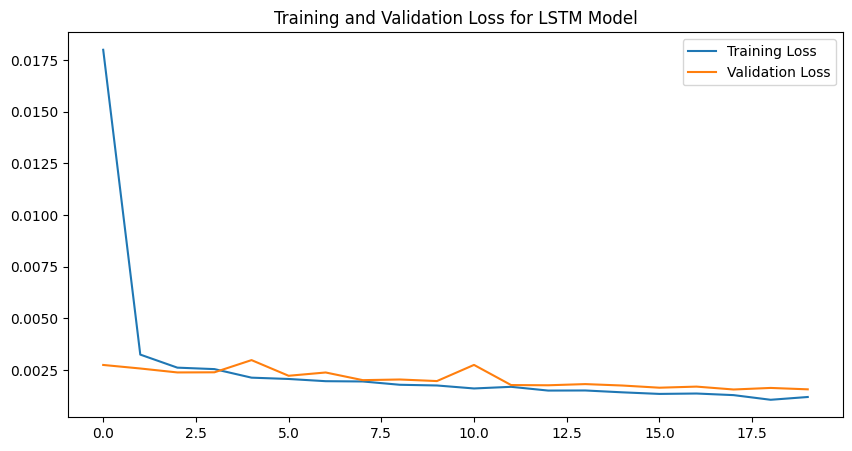

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


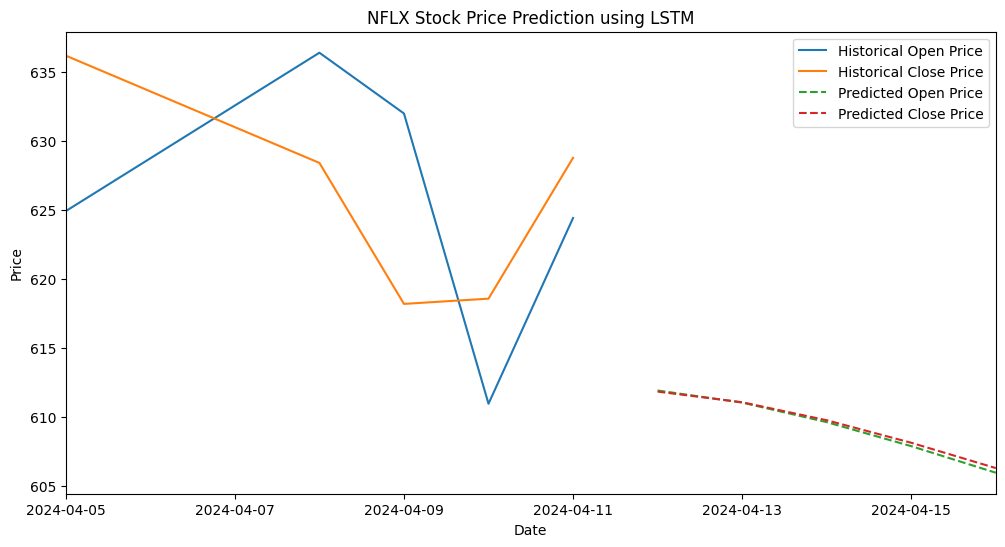

LSTM - Training Time: 71.4570209980011 seconds
LSTM - RMSE Open: 24.177332922686066
LSTM - RMSE Close: 27.9032665466186



In [1]:
import time
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data[['Open', 'Close']]

def preprocess_data(data, sequence_length):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])
        y.append(scaled_data[i, 0:2])
    return np.array(X), np.array(y), scaler

def build_model(input_shape):
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=2)  # Predicting both Open and Close prices
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def train_model(model, X_train, y_train, X_val, y_val):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping]
    )
    return history

def predict_next_days(model, data, sequence_length, days_to_predict, scaler):
    last_sequence = data[-sequence_length:]
    predictions = []
    for _ in range(days_to_predict):
        last_sequence_scaled = scaler.transform(last_sequence)
        prediction = model.predict(last_sequence_scaled[np.newaxis, :, :])
        prediction_unscaled = scaler.inverse_transform(prediction)
        predictions.append(prediction_unscaled[0])
        last_sequence = np.vstack((last_sequence[1:], prediction_unscaled))
    return predictions

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# User input
ticker = input("Enter ticker symbol: ")
start_date = '2012-01-01'
end_date = '2024-04-12'
results = {   
    'LSTM': {'RMSE Open': None, 'RMSE Close': None, 'Training Time': None},
    }

# Fetch and preprocess data
data = fetch_data(ticker, start_date, end_date)
sequence_length = 90
train_size = int(len(data) * 0.8)

# Preprocess the training and validation separately to avoid leakage
X_train, y_train, scaler = preprocess_data(data.iloc[:train_size], sequence_length)
X_val, y_val, _ = preprocess_data(data.iloc[train_size:], sequence_length)

# Record the training time
start_time = time.time()

# Build and train the model
model = build_model((sequence_length, X_train.shape[2]))
history = train_model(model, X_train, y_train, X_val, y_val)
lstm_training_time = time.time() - start_time
results['LSTM']['Training Time'] = lstm_training_time
# Display training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for LSTM Model')
plt.legend()
plt.show()

# Predict on the validation set and calculate RMSE
val_predictions = model.predict(X_val)
val_predictions_unscaled = scaler.inverse_transform(val_predictions)
val_true_unscaled = scaler.inverse_transform(y_val)
lstm_rmse_open = calculate_rmse(val_true_unscaled[:, 0], val_predictions_unscaled[:, 0])
lstm_rmse_close = calculate_rmse(val_true_unscaled[:, 1], val_predictions_unscaled[:, 1])
results['LSTM']['RMSE Open'] = lstm_rmse_open
results['LSTM']['RMSE Close'] = lstm_rmse_close

# Predict next 5 days
days_to_predict = 5
predictions = predict_next_days(model, data[-sequence_length:].values, sequence_length, days_to_predict, scaler)

# Plotting predictions
plt.figure(figsize=(12, 6))
last_5_days_index = data.index[-5:]
plt.plot(last_5_days_index, data['Open'][-5:], label='Historical Open Price')
plt.plot(last_5_days_index, data['Close'][-5:], label='Historical Close Price')
predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=days_to_predict)
plt.plot(predicted_dates, [p[0] for p in predictions], label='Predicted Open Price', linestyle='--')
plt.plot(predicted_dates, [p[1] for p in predictions], label='Predicted Close Price', linestyle='--')

# Set the x-axis range to include both historical and predicted dates
plt.xlim([last_5_days_index[0], predicted_dates[-1]])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Prediction using LSTM')
plt.legend()
plt.show()
for model, metrics in results.items():
    print(f"{model} - Training Time: {metrics['Training Time']} seconds")
    print(f"{model} - RMSE Open: {metrics['RMSE Open']}")
    print(f"{model} - RMSE Close: {metrics['RMSE Close']}\n")

[*********************100%%**********************]  1 of 1 completed


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21362.221, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21364.219, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21364.219, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21362.286, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21366.030, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.595 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=21519.405, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21517.447, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21517.919, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21517.960, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21517.436, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21519.015, Time=0.59 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]   

c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the n

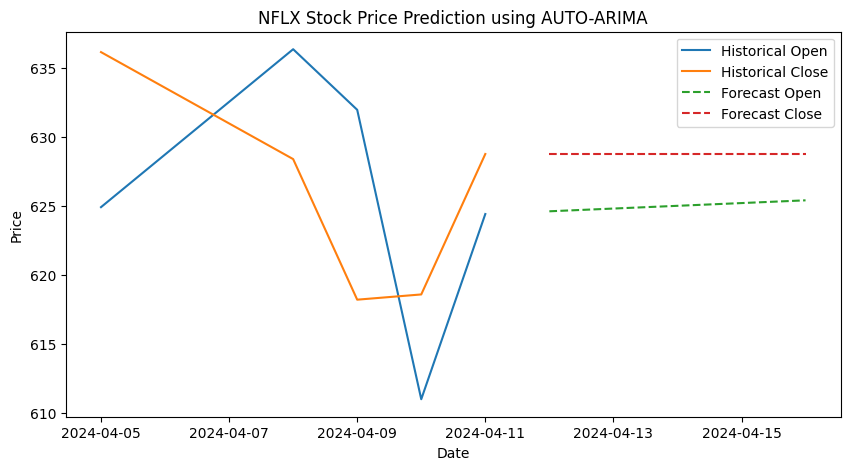

Auto-ARIMA - Training Time: 4.578891038894653 seconds
Auto-ARIMA - RMSE Open: 8.792781165127916
Auto-ARIMA - RMSE Close: 7.360345239321501



In [7]:
import time
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Automatically fit the best ARIMA model
def fit_auto_arima(series, seasonal=False):
    model = auto_arima(series, seasonal=seasonal, trace=True)
    return model

# Make predictions
def forecast(model, steps):
    prediction = model.predict(n_periods=steps)
    return prediction
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# User input
ticker = input("Enter ticker symbol: ")
start_date = '2012-01-01'
end_date = '2024-04-12'
results = {   
    'Auto-ARIMA': {'RMSE Open': None, 'RMSE Close': None, 'Training Time': None},
    }
# Fetch data
data = fetch_data(ticker, start_date, end_date)

# Start the timer for training time
start_time = time.time()
# Fit ARIMA models
model_open = fit_auto_arima(data['Open'])
model_close = fit_auto_arima(data['Close'])
# End the timer and calculate training time
auto_arima_training_time = time.time() - start_time
results['Auto-ARIMA']['Training Time'] = auto_arima_training_time

# Forecast the next 5 days
days_to_predict = 5
forecast_open = forecast(model_open, days_to_predict)
forecast_close = forecast(model_close, days_to_predict)

auto_arima_rmse_open = calculate_rmse(data['Open'].iloc[-5:], forecast_open)
auto_arima_rmse_close = calculate_rmse(data['Close'].iloc[-5:], forecast_close)
results['Auto-ARIMA']['RMSE Open'] = auto_arima_rmse_open
results['Auto-ARIMA']['RMSE Close'] = auto_arima_rmse_close

# Get the last 5 days for plotting
last_5_days = data[-5:]

# Predicted dates
predicted_dates = pd.date_range(start=last_5_days.index[-1] + pd.Timedelta(days=1), periods=days_to_predict)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(data.index[-5:], data['Open'][-5:], label='Historical Open')
plt.plot(data.index[-5:], data['Close'][-5:], label='Historical Close')
plt.plot(predicted_dates, forecast_open, label='Forecast Open', linestyle='--')
plt.plot(predicted_dates, forecast_close, label='Forecast Close', linestyle='--')
plt.title(f'{ticker} Stock Price Prediction using AUTO-ARIMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
for model, metrics in results.items():
    print(f"{model} - Training Time: {metrics['Training Time']} seconds")
    print(f"{model} - RMSE Open: {metrics['RMSE Open']}")
    print(f"{model} - RMSE Close: {metrics['RMSE Close']}\n")

[*********************100%%**********************]  1 of 1 completed
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\abhim\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmode

Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 15534.2090 - val_loss: 77530.0781
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 14589.1953 - val_loss: 75612.6406
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 13940.0283 - val_loss: 73952.5312
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 13221.0176 - val_loss: 72399.3594
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 12970.5303 - val_loss: 70902.4297
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 12103.3291 - val_loss: 69388.6406
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 11170.1807 - val_loss: 67934.4922
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 10786.6055 - val_loss: 66534.0469
Epoch 9/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 10676.9893 - val_loss: 65189.4531
Epoch 10/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 10125.4014 - val_loss: 63885.0977
Epoch 11/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9189.4990

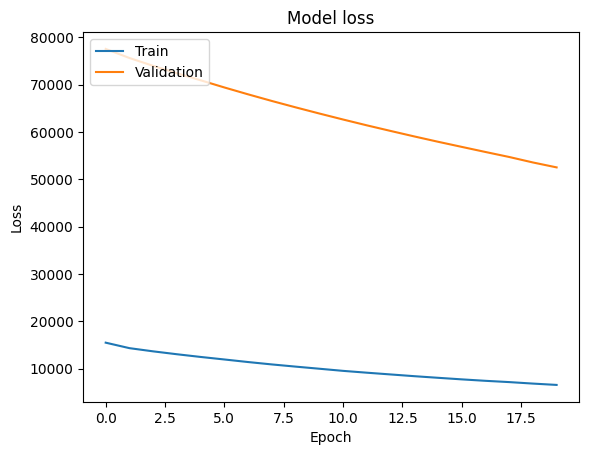

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Combined ARIMA-LSTM Model RMSE for Open: 218.845275106634
Combined ARIMA-LSTM Model RMSE for Close: 218.27225069306942
Training Time: 66.42 seconds
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


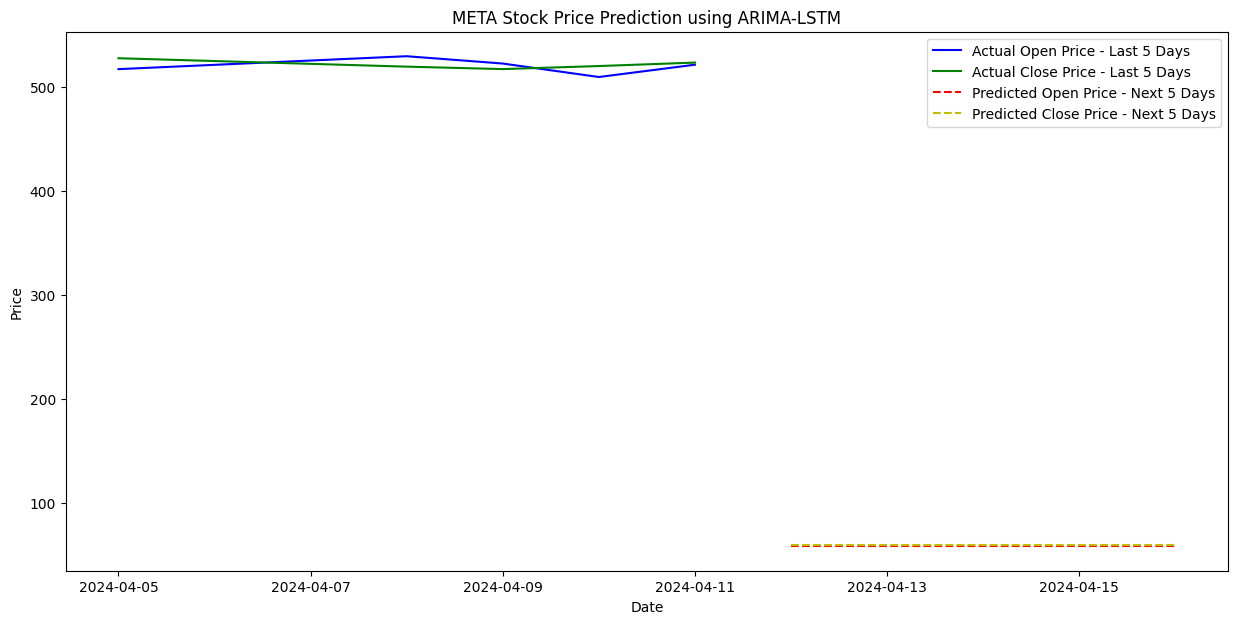

In [17]:
import time
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define a function to fetch and preprocess data
def fetch_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data[['Open', 'Close']]

# Define a function to calculate RMSE
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Load your data
ticker = 'META'
start_date = '2012-01-01'
end_date = '2024-04-12'
data = fetch_data(ticker, start_date, end_date)

# Fit ARIMA models for Open and Close prices
arima_order = (5, 1, 0)
arima_model_open = ARIMA(data['Open'], order=arima_order)
arima_result_open = arima_model_open.fit()
arima_predictions_open = arima_result_open.predict(start=0, end=len(data) - 1)

arima_model_close = ARIMA(data['Close'], order=arima_order)
arima_result_close = arima_model_close.fit()
arima_predictions_close = arima_result_close.predict(start=0, end=len(data) - 1)

# Calculate residuals for Open and Close
residuals_open = data['Open'] - arima_predictions_open
residuals_close = data['Close'] - arima_predictions_close
residuals_combined = np.hstack([residuals_open.values.reshape(-1, 1), residuals_close.values.reshape(-1, 1)])

# Scale the residuals for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals_combined)


# Scale the residuals for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
residuals_scaled = scaler.fit_transform(residuals_scaled.reshape(-1, 1))

# Prepare the data for LSTM
sequence_length = 90
X, y = [], []
for i in range(sequence_length, len(data)):
    # Ensure index for X is within the bounds
    if i < len(residuals_scaled) + sequence_length:
        X.append(residuals_scaled[i-sequence_length:i])
        y.append([data['Open'][i], data['Close'][i]])
X, y = np.array(X), np.array(y)

# Split the data into training, validation, and testing sets
train_size = int(len(X) * 0.8)
val_size = int(train_size * 0.2)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_val = X_train[:-val_size], X_train[-val_size:]
y_train, y_val = y_train[:-val_size], y_train[-val_size:]

# Build the LSTM model
model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(units=50, return_sequences=False),
        Dropout(0.2),
        Dense(units=2)  # Predicting both Open and Close prices
    ])  # Output two predictions per input sequence (Open and Close)
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='mean_squared_error')

# Fit the model and measure training time
start_time = time.time()
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=20, 
    batch_size=32, 
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
training_time = time.time() - start_time

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the test set
lstm_predictions_scaled = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

# Combine ARIMA predictions with LSTM predictions on the residuals
# We are using LSTM to predict the 'Open' and 'Close', so we adjust the RMSE calculation accordingly
combined_rmse_open = calculate_rmse(data['Open'].iloc[-len(lstm_predictions):], lstm_predictions[:, 0])
combined_rmse_close = calculate_rmse(data['Close'].iloc[-len(lstm_predictions):], lstm_predictions[:, 1])

# Print the results
print(f'Combined ARIMA-LSTM Model RMSE for Open: {combined_rmse_open}')
print(f'Combined ARIMA-LSTM Model RMSE for Close: {combined_rmse_close}')
print(f'Training Time: {training_time:.2f} seconds')

# Make predictions for the next 5 days using the LSTM model
last_sequence = X[-1]  # Take the last sequence from the preprocessed data
next_5_days_predictions_scaled = model.predict(np.array([last_sequence]*5))
next_5_days_predictions = scaler.inverse_transform(next_5_days_predictions_scaled)

# Predicted dates
predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=5)

# Plot the last 5 days of actual open and close prices
plt.figure(figsize=(15, 7))
plt.plot(data.index[-5:], data['Open'][-5:], 'b-', label='Actual Open Price - Last 5 Days')
plt.plot(data.index[-5:], data['Close'][-5:], 'g-', label='Actual Close Price - Last 5 Days')

# Plot the predicted next 5 days of open and close prices
plt.plot(predicted_dates, next_5_days_predictions[:, 0], 'r--', label='Predicted Open Price - Next 5 Days')
plt.plot(predicted_dates, next_5_days_predictions[:, 1], 'y--', label='Predicted Close Price - Next 5 Days')

plt.title(f'{ticker} Stock Price Prediction using ARIMA-LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
